<a href="https://colab.research.google.com/github/4GeeksAcademy/Arboles-de-decision-python-template/blob/main/Arboles_d__Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Analisis exploratorio

In [2]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.columns = data.columns.str.lower()
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies. Número de embarazos del paciente (numérico)  
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)  
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)  
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)  
Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)  
BMI. Índice de masa corporal (numérico)  
DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)  
Age. Edad del paciente (numérico)  
Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)  

In [3]:
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Analisis univariante



*   Numericas (no hay categoricas)



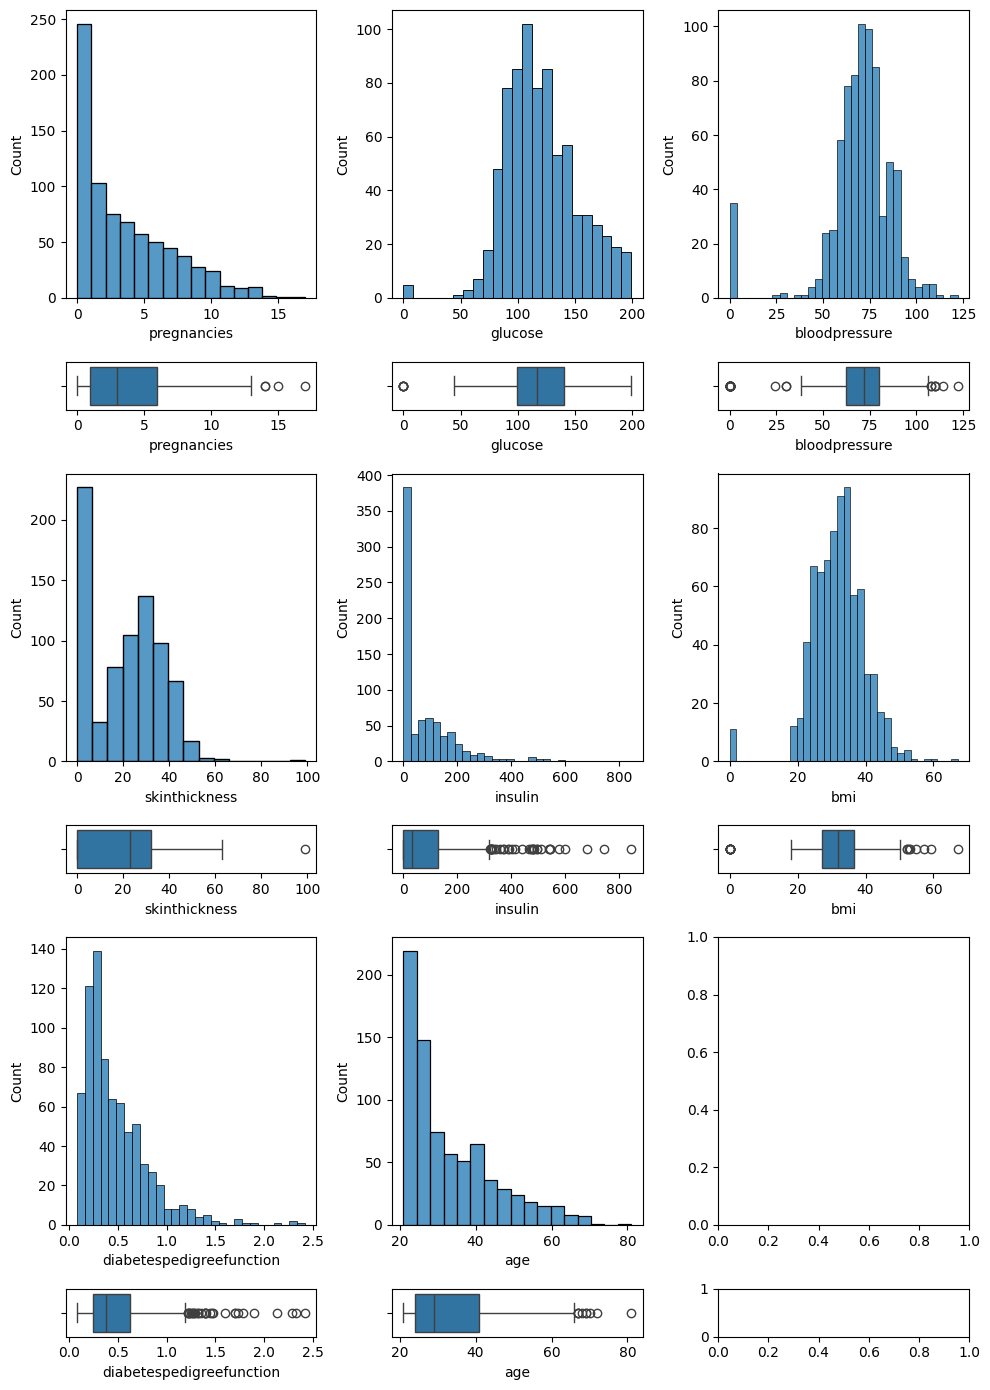

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(6, 3, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "pregnancies")
sns.boxplot(ax = axis[1, 0], data = data, x = "pregnancies")

sns.histplot(ax = axis[0, 1], data = data, x = "glucose")
sns.boxplot(ax = axis[1,1], data = data, x = "glucose")

sns.histplot(ax = axis[0, 2], data = data, x = "bloodpressure")
sns.boxplot(ax = axis[1, 2], data = data, x = "bloodpressure")

sns.histplot(ax = axis[2,0], data = data, x = "skinthickness")
sns.boxplot(ax = axis[3, 0], data = data, x = "skinthickness")

sns.histplot(ax = axis[2,1], data = data, x = "insulin")
sns.boxplot(ax = axis[3, 1], data = data, x = "insulin")

sns.histplot(ax = axis[2,2], data = data, x = "bmi")
sns.boxplot(ax = axis[3, 2], data = data, x = "bmi")

sns.histplot(ax = axis[4,0], data = data, x = "diabetespedigreefunction")
sns.boxplot(ax = axis[5, 0], data = data, x = "diabetespedigreefunction")

sns.histplot(ax = axis[4,1], data = data, x = "age")
sns.boxplot(ax = axis[5, 1], data = data, x = "age")


plt.tight_layout()

plt.show()

Diabetes e insulina es la que más atipicos tiene, pero es lógico porque los valores de los enfermos están muy por encima de las personas sin enfermedad, asi que los mantendria en la ingieneria.

Analisis multivariante

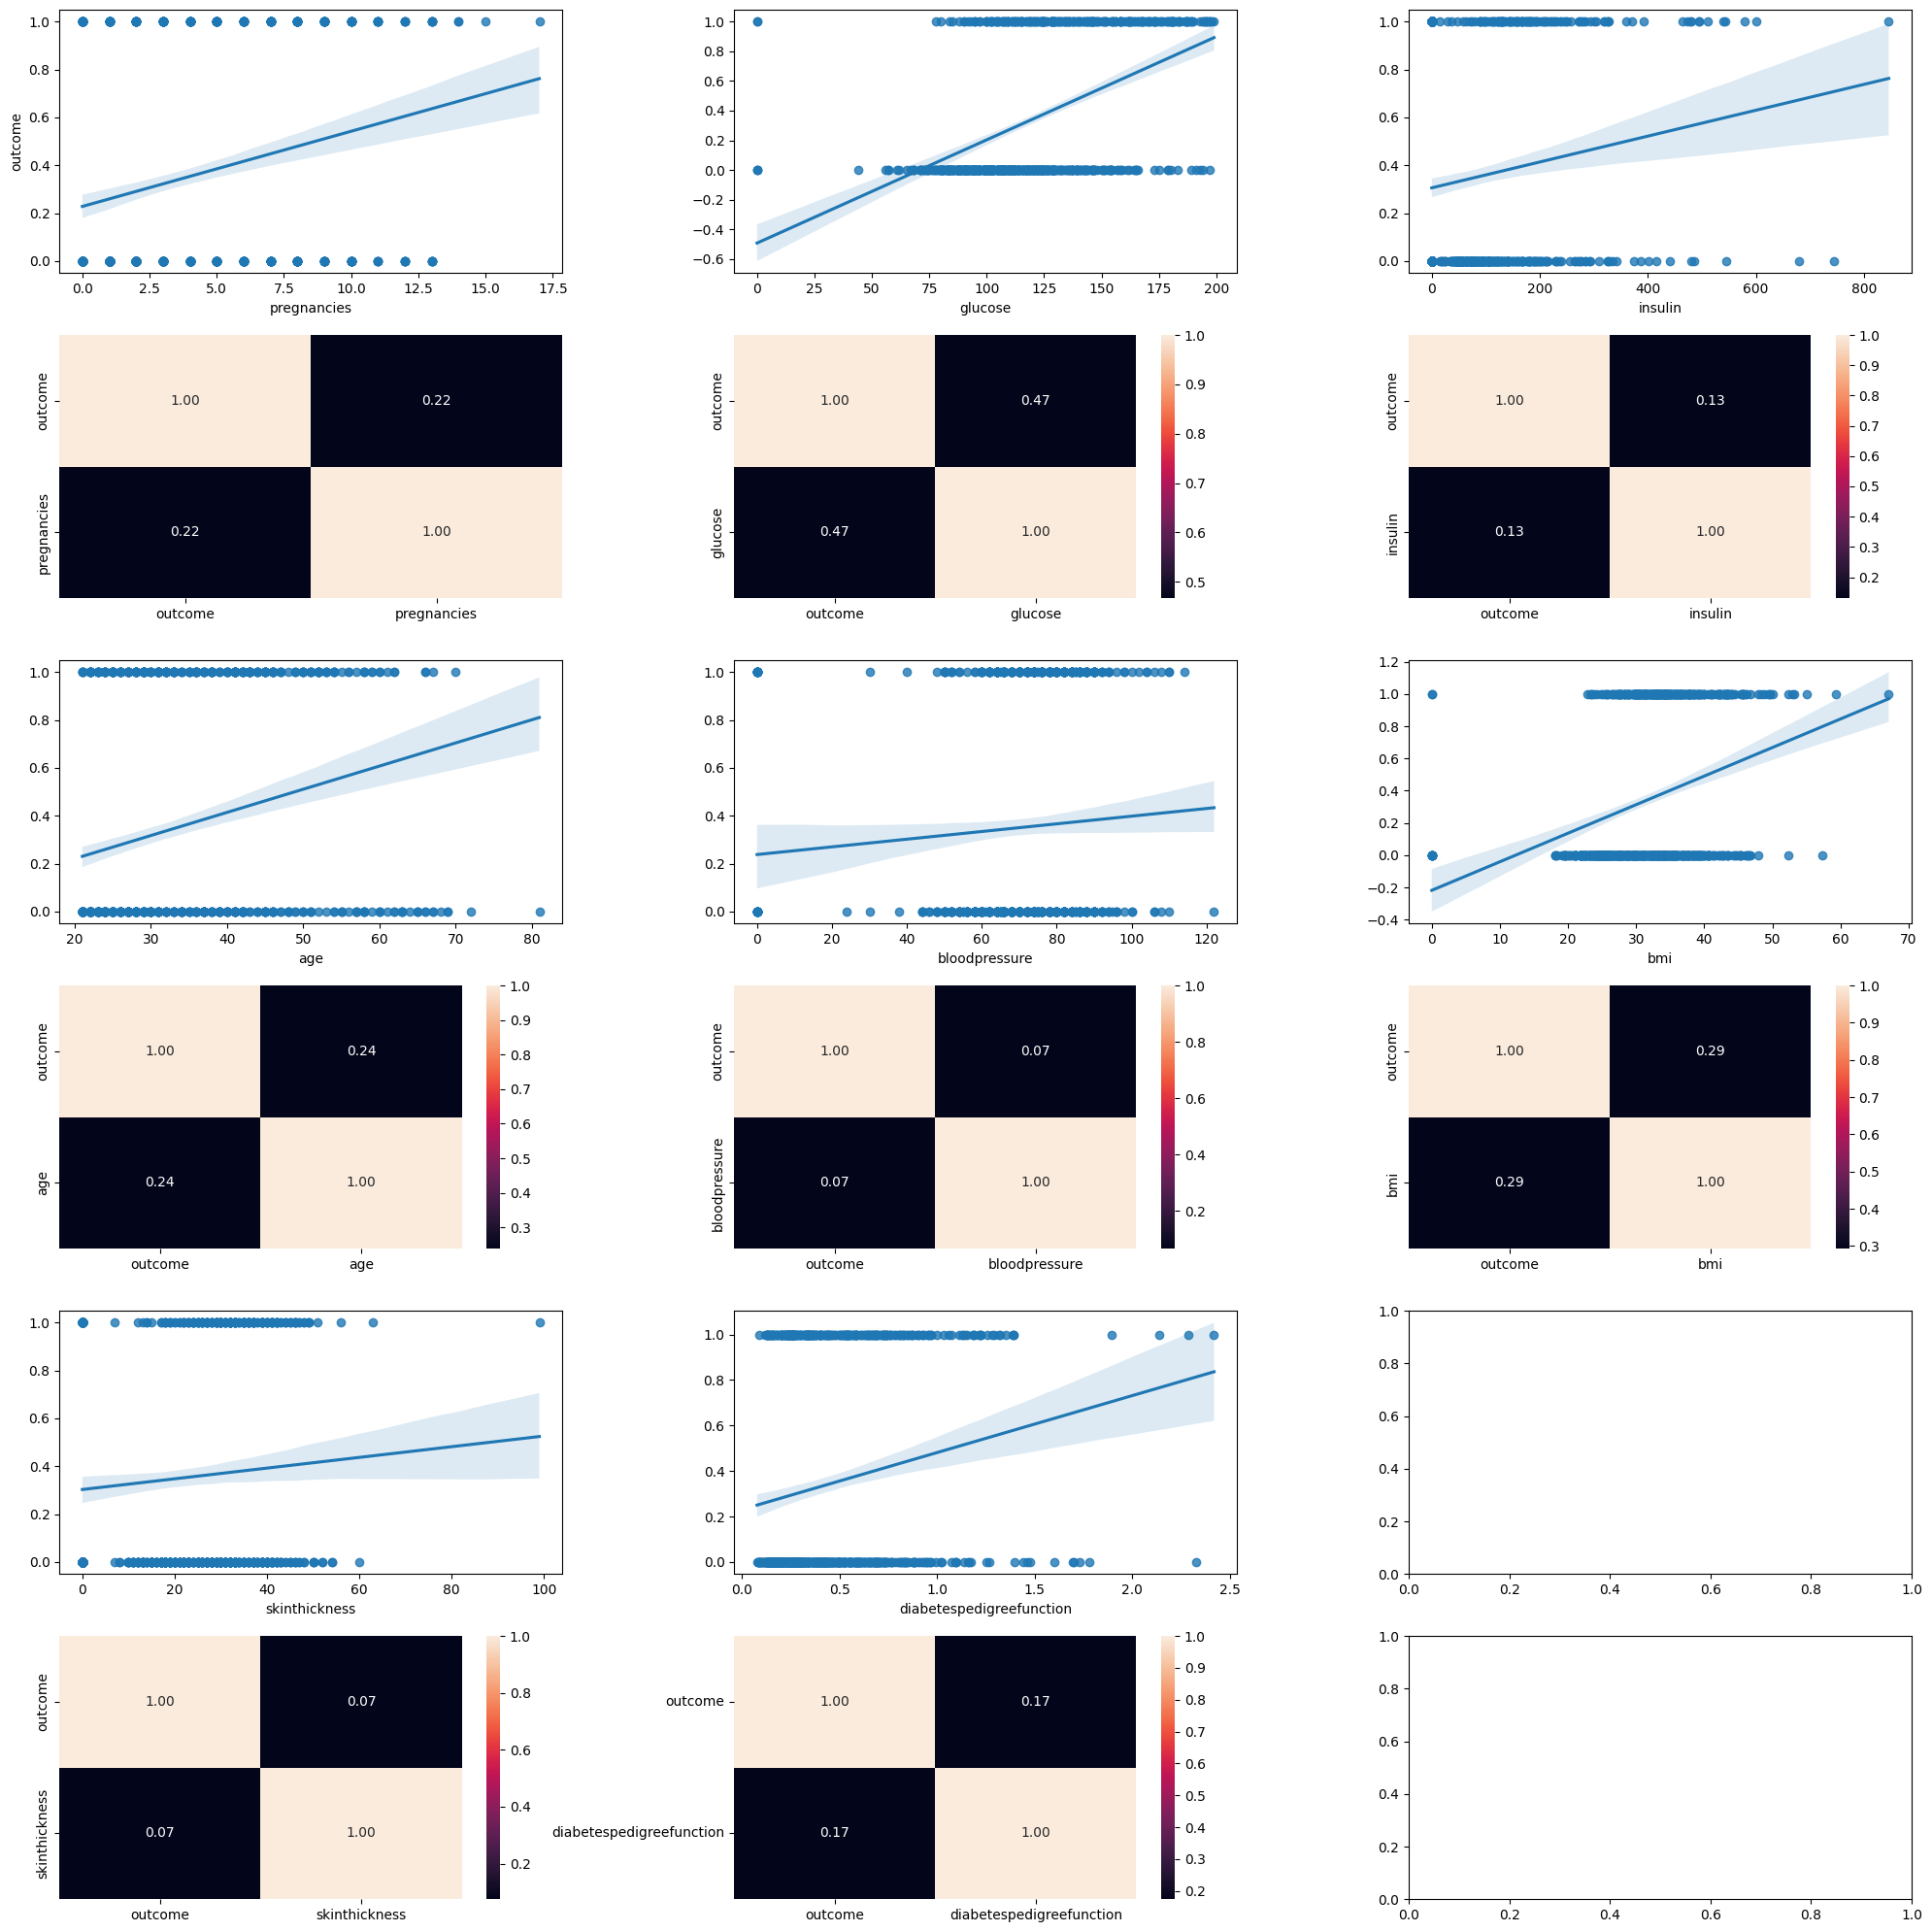

In [7]:
fig, axis = plt.subplots(6, 3, figsize = (20, 20))

sns.regplot(ax = axis[0, 0], data = data, x = "pregnancies", y = "outcome")
sns.heatmap(data[["outcome", "pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "glucose", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = data, x = "insulin", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)

sns.regplot(ax = axis[2, 0], data = data, x = "age", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = data, x = "bloodpressure", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "bloodpressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

sns.regplot(ax = axis[2, 2], data = data, x = "bmi", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2]).set(ylabel = None)


sns.regplot(ax = axis[4, 0], data = data, x = "skinthickness", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "skinthickness"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0]).set(ylabel = None)

sns.regplot(ax = axis[4, 1], data = data, x = "diabetespedigreefunction", y = "outcome").set(ylabel = None)
sns.heatmap(data[["outcome", "diabetespedigreefunction"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

La que tiene mas correlacion, evidentemente, es glucosa

Análisis numérico (completo)

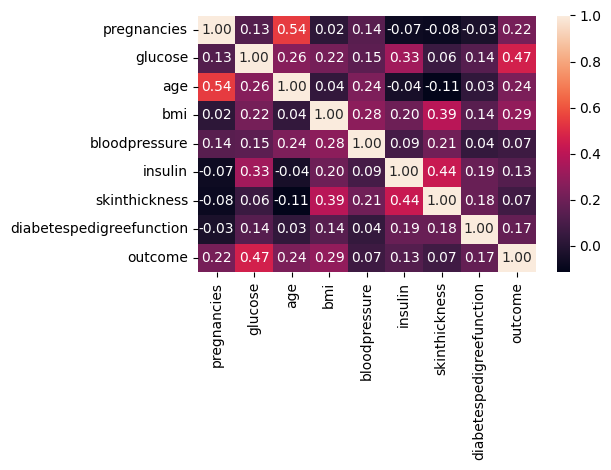

In [8]:

sns.heatmap(data[["pregnancies", "glucose", "age", "bmi", "bloodpressure",
                        "insulin", "skinthickness", "diabetespedigreefunction", "outcome"]].corr(), annot = True, fmt = ".2f")



plt.tight_layout()

plt.show()

Ingieneria de caracteristicas (no tenia datos perdidos asi que solo atipicos)

In [9]:
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


La unica que voy a transformar es la de embarazos, el resto son datos medicos que son comprensibes por lo que decido mantenerlos. En el caso de embarazos, 17 es una barbaridad por lo que esa variable la voy a imputar con la media

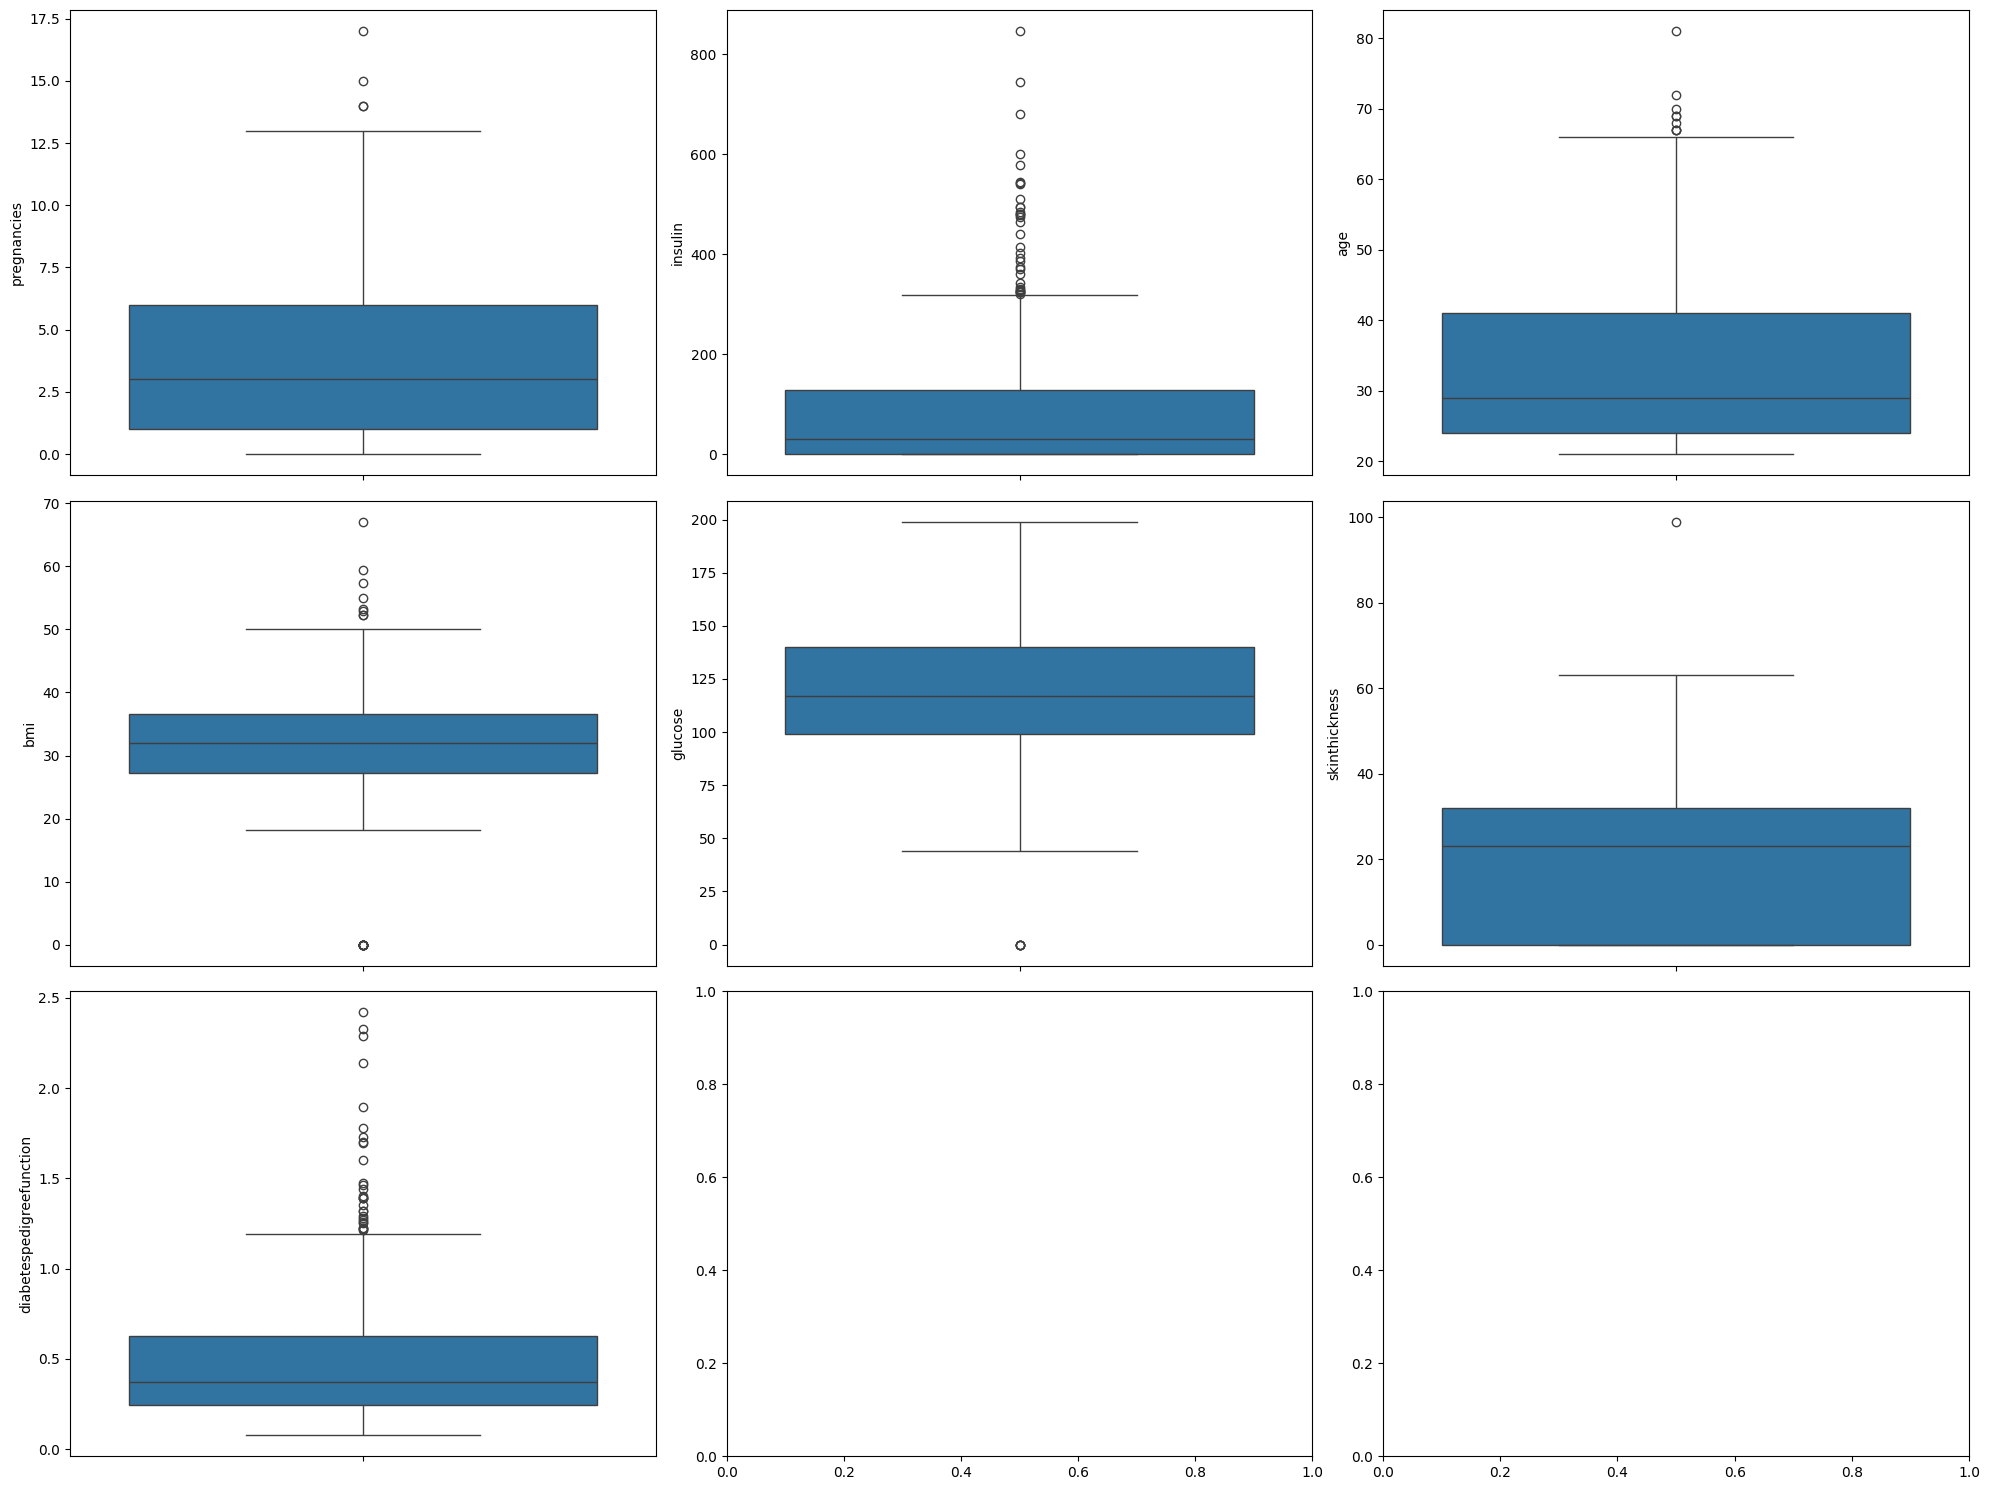

In [10]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "pregnancies")
sns.boxplot(ax = axes[0, 1], data = data, y = "insulin")
sns.boxplot(ax = axes[0, 2], data = data, y = "age")
sns.boxplot(ax = axes[1, 0], data = data, y = "bmi")
sns.boxplot(ax = axes[1, 1], data = data, y = "glucose")
sns.boxplot(ax = axes[1, 2], data = data, y = "skinthickness")
sns.boxplot(ax = axes[2, 0], data = data, y = "diabetespedigreefunction")

plt.tight_layout()

plt.show()

Decido hacer finalmente 4 imputaciones, junto con pregnancies añado bmi y glucose porque ambas tienen un unico valor 0, y skinthickness un valor de 100 que es imposible y:                                          
Los árboles de decisión pueden ser sensibles a los valores atípicos en los datos. Los valores atípicos pueden afectar la estructura del árbol y la precisión de las predicciones de varias maneras:

Impacto en las divisiones del árbol: Los valores atípicos pueden influir en la selección de las divisiones del árbol durante el proceso de construcción del modelo. Dependiendo de su ubicación en el espacio de características, los valores atípicos pueden llevar a divisiones inusuales que no representan bien la distribución general de los datos.

Sensibilidad a los valores extremos: Los árboles de decisión pueden dividir los datos en función de umbrales específicos en las características. Los valores atípicos pueden influir en estos umbrales y conducir a divisiones que no reflejan la verdadera tendencia de los datos.

Ruido en los datos: Los valores atípicos pueden introducir ruido en los datos, lo que puede afectar la precisión del modelo. Los árboles de decisión pueden sobreajustarse a los valores atípicos si no se manejan correctamente, lo que puede resultar en un rendimiento deficiente en datos nuevos o no vistos.

In [11]:
pregnancies_stats = data["pregnancies"].describe()
pregnancies_stats

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnancies, dtype: float64

In [12]:
pregnancies_iqr = pregnancies_stats["75%"] - pregnancies_stats["25%"]
upper_limit = pregnancies_stats["75%"] + 1.5 * pregnancies_iqr
lower_limit = pregnancies_stats["25%"] - 1.5 * pregnancies_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(pregnancies_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y -6.5, con un rango intercuartílico de 5.0


In [13]:
mean_pregnancies = data['pregnancies'].mean()
data['pregnancies'] = data['pregnancies'].apply(lambda x: mean_pregnancies if x < lower_limit or x > upper_limit else x)

In [14]:
pregnancies = data["pregnancies"].describe()
pregnancies

count    768.000000
mean       3.786953
std        3.270156
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: pregnancies, dtype: float64

El valos maximo ahora esta en 13, pero ya lo dejo porque hay personas que si tienen ese numero de embarazos y la media esta mas cerca del 50%, sigue siendo algo alta, pero bueno

Los siguientes prefiero con la mediana

In [15]:
bmi_stats = data["bmi"].describe()
bmi_stats

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: bmi, dtype: float64

In [16]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 50.55 y 13.35, con un rango intercuartílico de 9.3


In [17]:
median_bmi = data['bmi'].median()
data['bmi'] = data['bmi'].apply(lambda x: median_bmi if x < lower_limit or x > upper_limit else x)

In [18]:
bmi = data["bmi"].describe()
bmi

count    768.000000
mean      32.198958
std        6.410558
min       18.200000
25%       27.500000
50%       32.000000
75%       36.300000
max       50.000000
Name: bmi, dtype: float64

In [19]:
skinthickness_stats = data["skinthickness"].describe()
skinthickness_stats

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: skinthickness, dtype: float64

In [20]:
skinthickness_iqr = skinthickness_stats["75%"] - skinthickness_stats["25%"]
upper_limit = skinthickness_stats["75%"] + 1.5 * skinthickness_iqr
lower_limit = skinthickness_stats["25%"] - 1.5 * skinthickness_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(skinthickness_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 80.0 y -48.0, con un rango intercuartílico de 32.0


In [21]:
median_skinthickness = data['skinthickness'].median()
data['skinthickness'] = data['skinthickness'].apply(lambda x: median_skinthickness if x < lower_limit or x > upper_limit else x)

In [22]:
skinthickness = data["skinthickness"].describe()
skinthickness

count    768.000000
mean      20.437500
std       15.698554
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       63.000000
Name: skinthickness, dtype: float64

In [23]:
glucose_stats = data["glucose"].describe()
glucose_stats

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64

In [24]:
glucose_iqr = glucose_stats["75%"] - glucose_stats["25%"]
upper_limit = glucose_stats["75%"] + 1.5 * glucose_iqr
lower_limit = glucose_stats["25%"] - 1.5 * glucose_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(glucose_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 202.12 y 37.12, con un rango intercuartílico de 41.25


In [25]:
mean_glucose = data['glucose'].mean()
data['glucose'] = data['glucose'].apply(lambda x: mean_glucose if x < lower_limit or x > upper_limit else x)

In [26]:
glucose = data["glucose"].describe()
glucose

count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: glucose, dtype: float64

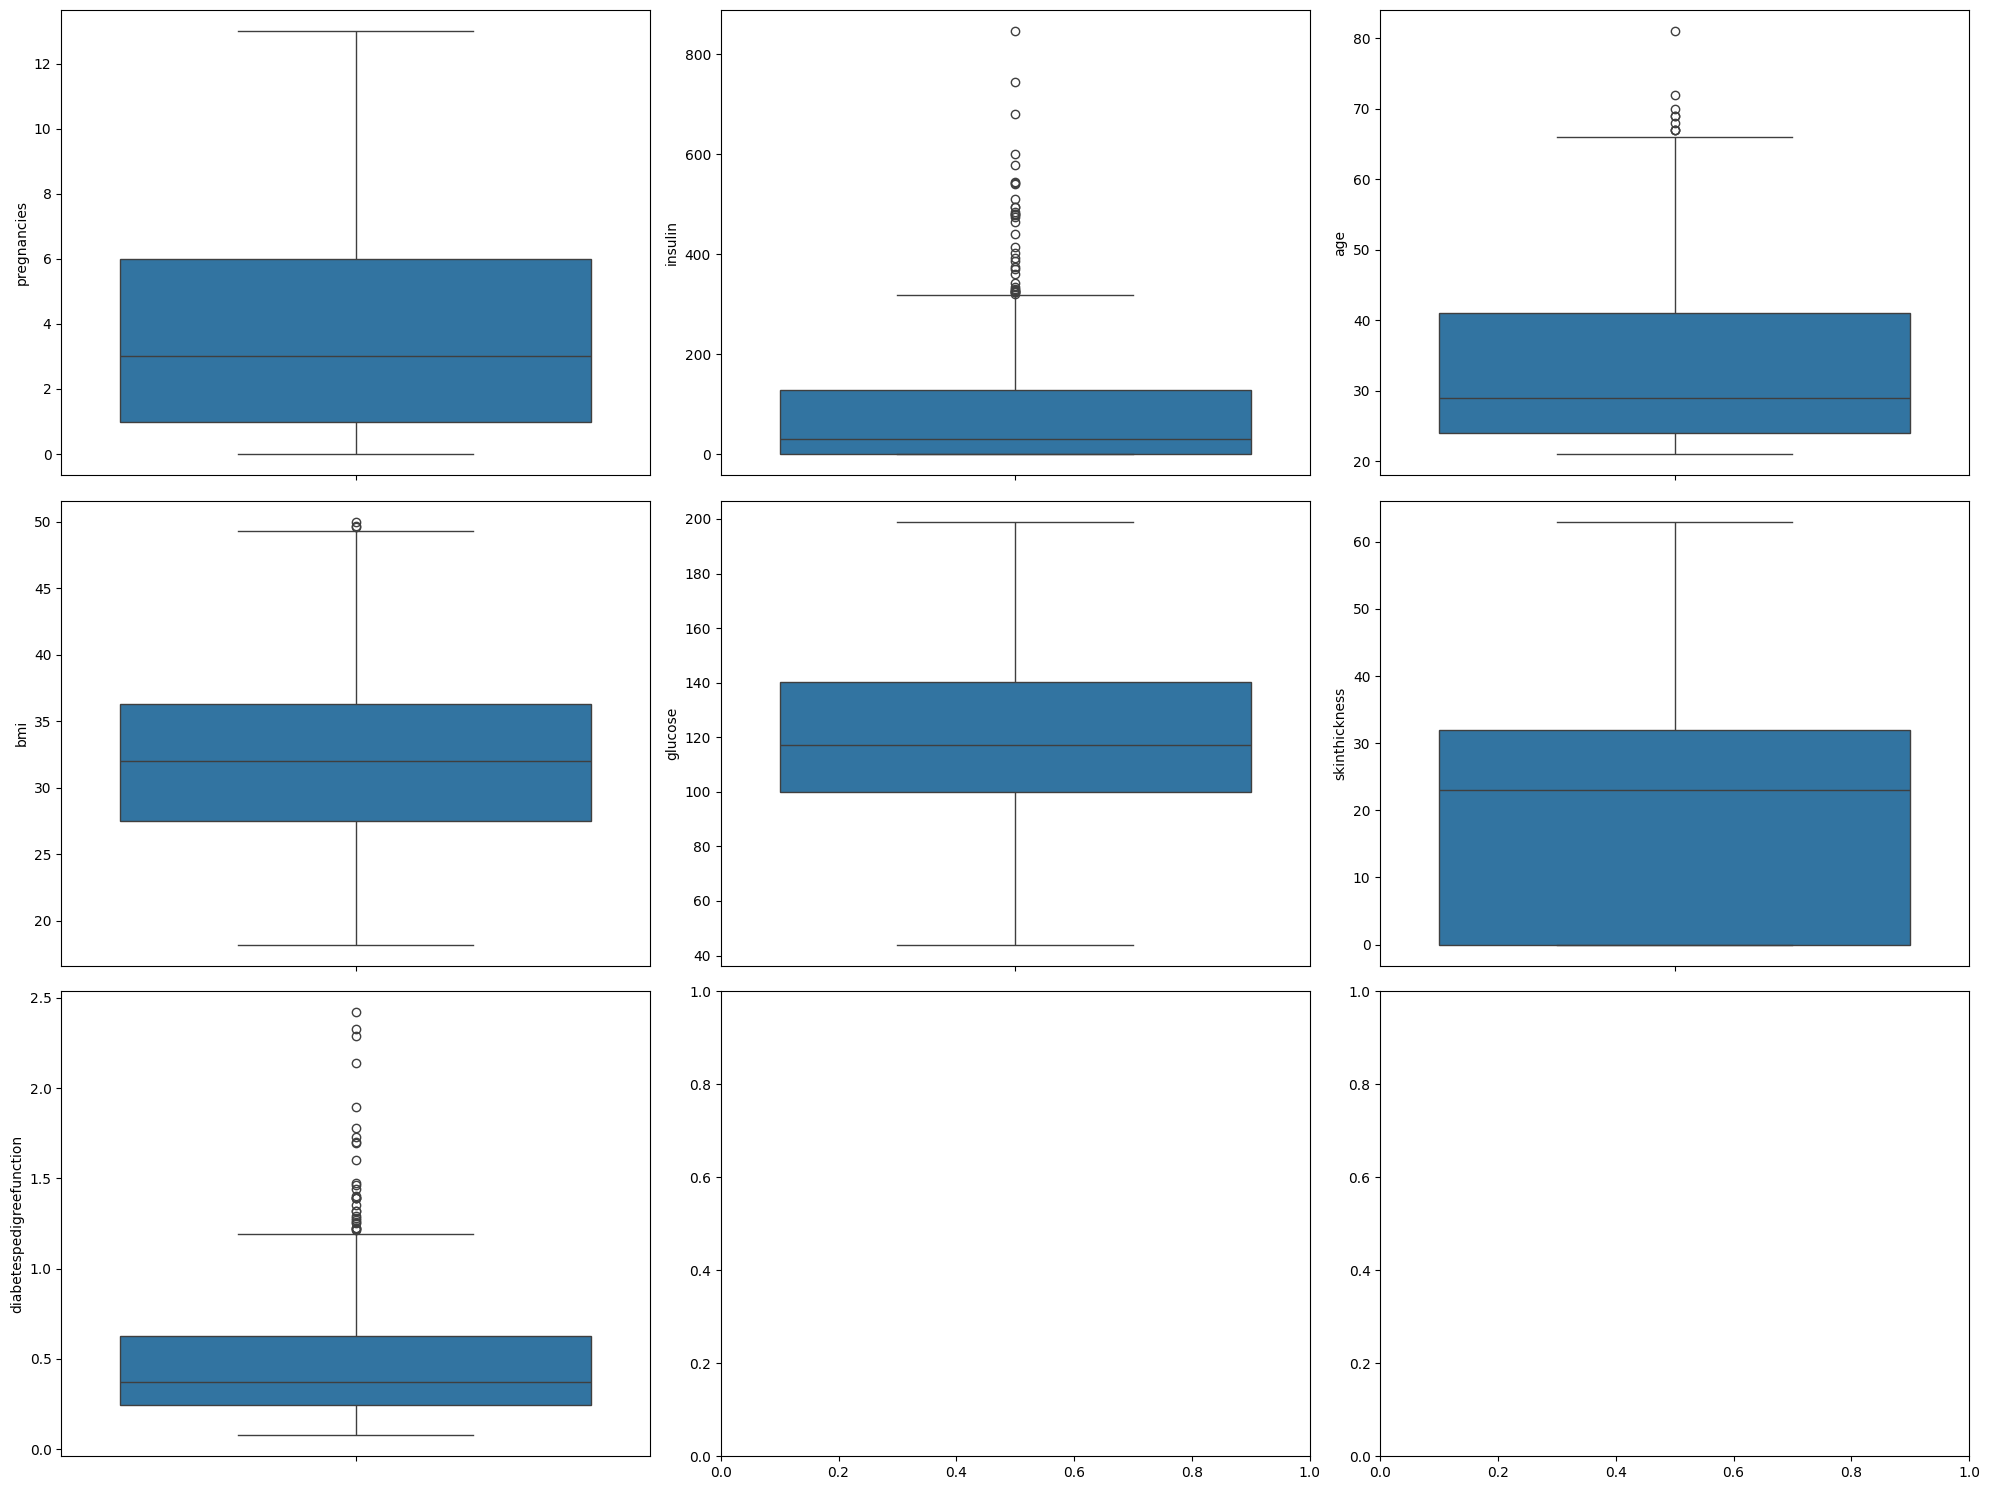

In [27]:
fig, axes = plt.subplots(3, 3, figsize = (20, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "pregnancies")
sns.boxplot(ax = axes[0, 1], data = data, y = "insulin")
sns.boxplot(ax = axes[0, 2], data = data, y = "age")
sns.boxplot(ax = axes[1, 0], data = data, y = "bmi")
sns.boxplot(ax = axes[1, 1], data = data, y = "glucose")
sns.boxplot(ax = axes[1, 2], data = data, y = "skinthickness")
sns.boxplot(ax = axes[2, 0], data = data, y = "diabetespedigreefunction")

plt.tight_layout()

plt.show()

Ya lo hemos solucionado

El escalado de valores no es necesario en este tipo de analisis pues es de clasificacion

In [42]:
data.to_csv("datos_arbol_decision.csv")

Seleccion de caracteristicas

In [28]:

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = data.drop("outcome", axis = 1)
y = data["outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
0,2.0,84.0,0.0,0.0,32.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [29]:
X_test_sel.head()

,pregnancies,glucose,bloodpressure,insulin,bmi,diabetespedigreefunction,age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


# 2.Arbol de Decision

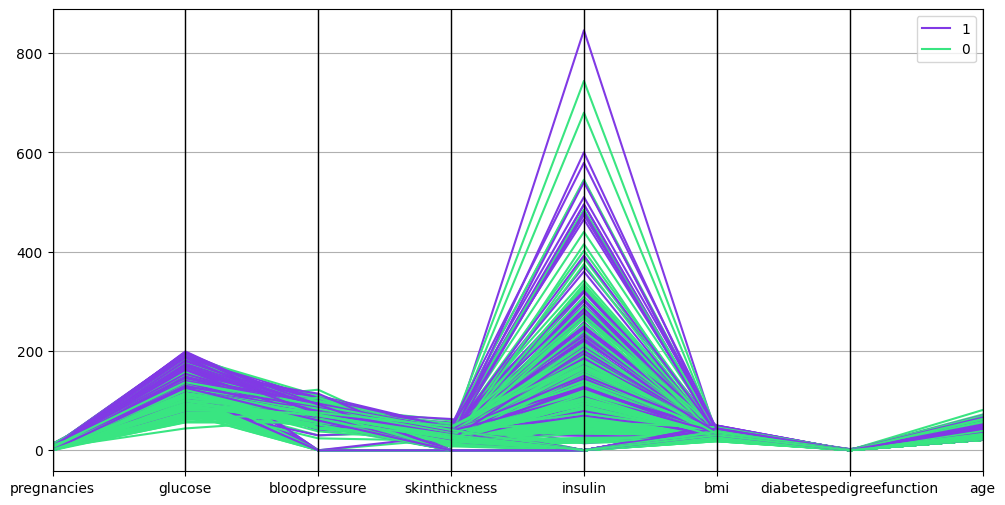

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(data, "outcome", color = ("#8139E5", "#39E581"))

plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

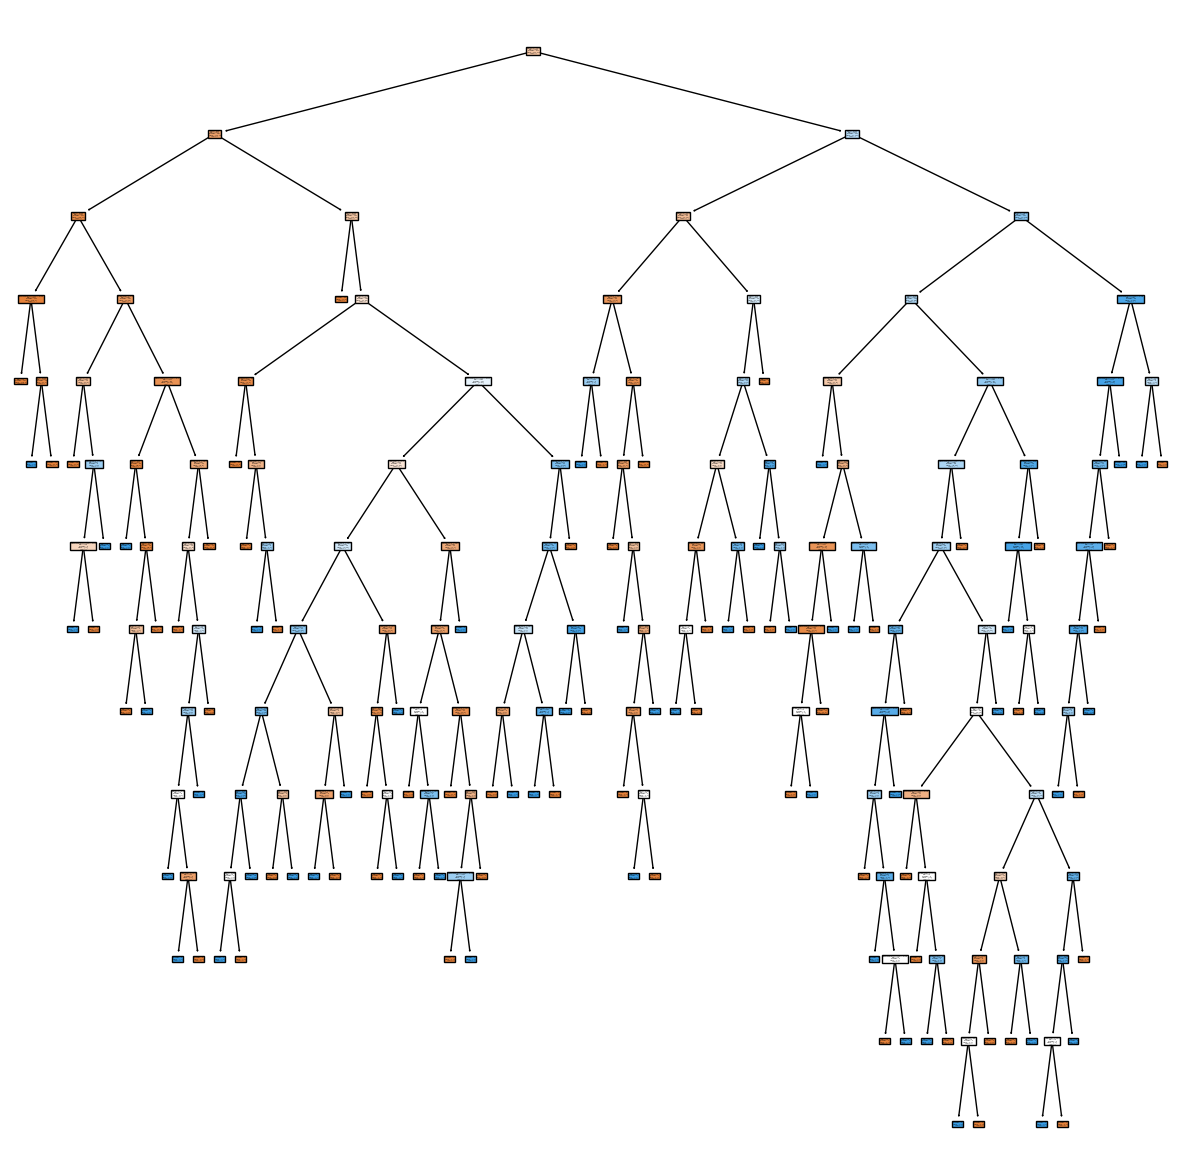

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [37]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [41]:
from pickle import dump

dump(model, open("arbol_de_decision.sav", "wb"))
dump(model, open("arbol_de_decision.csv", "wb"))

In [43]:
data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6.0,148.0,72,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64,0.0,0,23.3,0.672,32,1
3,1.0,89.0,66,23.0,94,28.1,0.167,21,0
4,0.0,137.0,40,35.0,168,43.1,2.288,33,1
